<h1>Урок 3. Классификация. Логистическая регрессия.</h1>

<h2>1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.</h2>

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
def calc_logloss(y, y_pred):
    delta = 1e-5
    # 1
    y_pred = y_pred.copy()
    y_pred = np.clip(y_pred, a_min=delta, a_max=1-delta)
    # Если y_pred равно 0 или 1 переопределим ее в минимальное значение
    # 2
    #if y_pred == 0:
    #    y_pred = delta
    #if y_pred == 1:
    #    y_pred = 1 - delta

    return - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))

<h2>2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.</h2>

In [3]:
X = np.array([
    [   1,    1,  500,    1],
    [   1,    1,  700,    1],
    [   1,    2,  750,    2],
    [   1,    5,  600,    1],
    [   1,    3, 1450,    2],
    [   1,    0,  800,    1],
    [   1,    5, 1500,    3],
    [   1,   10, 2000,    3],
    [   1,    1,  450,    1],
    [   1,    2, 1000,    2]
], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [4]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [5]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [6]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [7]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    errors, weights = [], []
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ

        errors.append(err.copy())
        weights.append(W.copy())

    return errors, weights

In [8]:
errors, weights = eval_model(X_st, y, iterations=500, eta=1e-4)
errors, weights

([1.1785958344356262,
  1.1783388206117205,
  1.178081850227778,
  1.1778249232949523,
  1.1775680398244004,
  1.1773111998272563,
  1.17705440331467,
  1.1767976502977708,
  1.1765409407877048,
  1.1762842747955884,
  1.1760276523325583,
  1.1757710734097326,
  1.175514538038228,
  1.1752580462291629,
  1.1750015979936492,
  1.1747451933427924,
  1.1744888322876965,
  1.174232514839463,
  1.1739762410091863,
  1.1737200108079586,
  1.1734638242468702,
  1.173207681337006,
  1.1729515820894467,
  1.1726955265152679,
  1.17243951462555,
  1.1721835464313521,
  1.1719276219437509,
  1.1716717411738031,
  1.1714159041325674,
  1.1711601108311034,
  1.1709043612804575,
  1.170648655491679,
  1.1703929934758108,
  1.1701373752438937,
  1.1698818008069622,
  1.1696262701760558,
  1.1693707833621934,
  1.1691153403764099,
  1.1688599412297176,
  1.1686045859331382,
  1.1683492744976867,
  1.1680940069343726,
  1.167838783254203,
  1.1675836034681768,
  1.167328467587298,
  1.167073375622558,


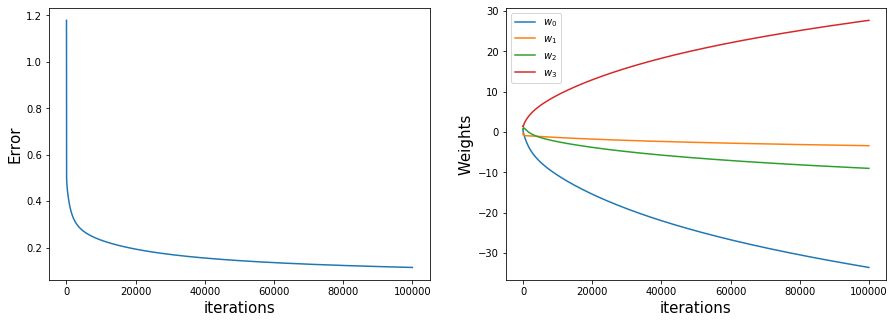

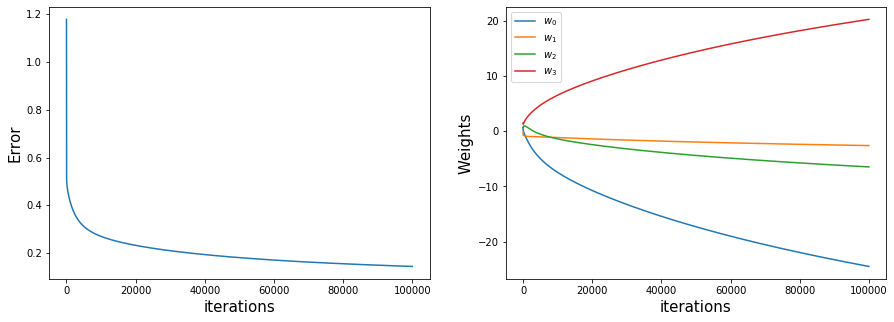

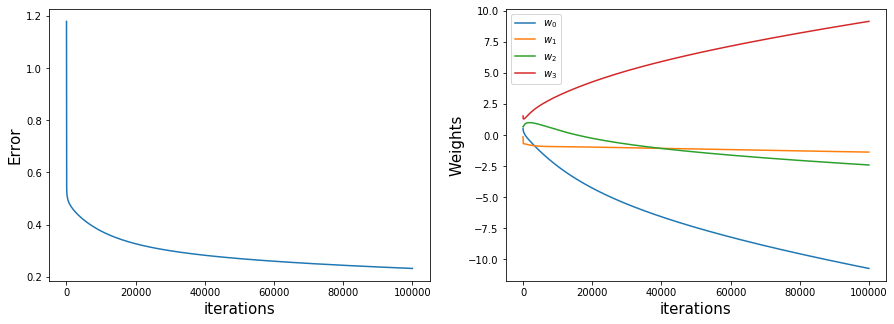

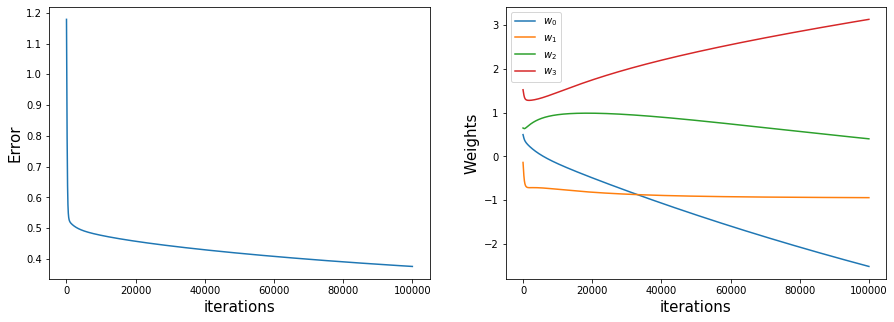

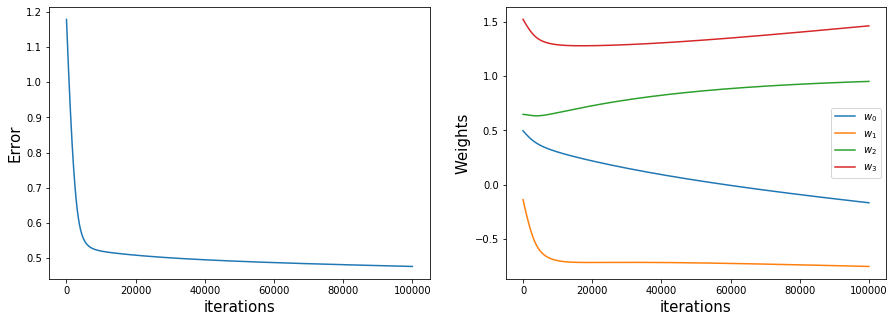

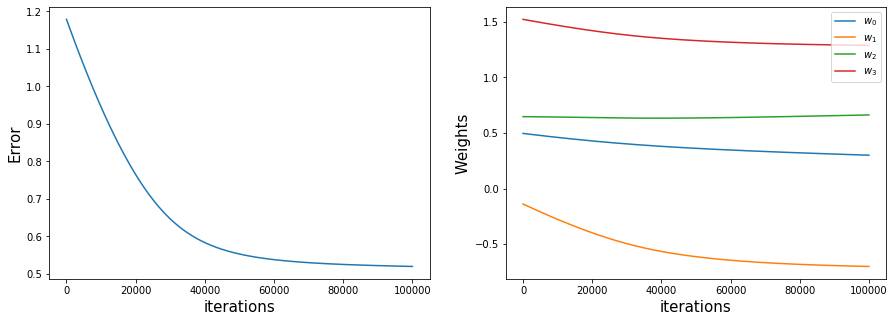

In [9]:
for eta_ in [0.1, 0.05, 0.01, 0.001, 0.0001, 0.00001]:
    current_errors, current_weights = eval_model(
        X_st,
        y,
        iterations=100000,
        eta=eta_
    )
    
    fig, (ax1, ax2) = plt.subplots(
        nrows=1, ncols=2,
        figsize=(15, 5)
    )

    ax1.plot(current_errors)
    ax1.set_xlabel("iterations", size=15)
    ax1.set_ylabel("Error", size=15)
    ax2.plot(current_weights)
    ax2.legend([f"$w_{i}$" for i in range(len(current_weights[0]))], loc="best")
    ax2.set_xlabel("iterations", size=15)
    ax2.set_ylabel("Weights", size=15)

In [16]:
err, W = eval_model(X_st, y, iterations=100000, eta=0.1)

<h2>Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).</h2>

In [10]:
# 1
def calc_pred_proba(W, X):
    y_pred = 1 / (1 + np.exp(-np.dot(W, X)))
    return y_pred
# 2
def calc_pred_proba(W, X):
    y_pred = sigmoid(np.dot(W, X))
    return y_pred

<h2>4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).</h2>

In [11]:
def calc_pred(W, X):
    p = calc_pred_proba(W, X)
    result_arr = (p > 0.45).astype(int)
    return result_arr

<h2>5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.</h2>

In [18]:
y_pred = sigmoid(np.dot(X, W[0]))

In [19]:
y.shape[0]

10

In [20]:
def my_accuracy_score(y, y_pred):
    return np.sum(y == y_pred) / len(y)

def my_confusion_matrix(y, y_pred):
    confusion_matrix = np.zeros((2, 2))
    for i in range(len(y)):
        if y_pred[i] == 1 and y[i] != 0:
            confusion_matrix[0][0] += 1
        elif y_pred[i] == 1 and y[i] != 1:
            confusion_matrix[0][1] += 1
        elif y_pred[i] == 0 and y[i] != 1:
            confusion_matrix[1][1] += 1
        else:
            confusion_matrix[1][0] += 1
    return confusion_matrix[0][0], confusion_matrix[1][1], confusion_matrix[0][1], confusion_matrix[1][0]

def my_precision_score(y, y_pred):
    tp, tn, fp, fn = my_confusion_matrix(y, y_pred)
    return tp / (tp + fp)

def my_recall_score(y, y_pred):
    tp, tn, fp, fn = my_confusion_matrix(y, y_pred)
    return tp / (tp + fn)

def my_f1_score(y, y_pred):
    precision = my_precision_score(y, y_pred)
    recall = my_recall_score(y, y_pred)
    return 2 * precision * recall / (precision + recall)


print(f'accuracy  {my_accuracy_score(y, y_pred)}')
print(f'confusion matrix {my_confusion_matrix(y, y_pred)}')
print(f'precision {my_precision_score(y, y_pred)}')
print(f'recall {my_recall_score(y, y_pred)}')
print(f'F1 {round(my_f1_score(y, y_pred), 2)}')

accuracy  0.5
confusion matrix (5.0, 0.0, 5.0, 0.0)
precision 0.5
recall 1.0
F1 0.67


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [22]:
accuracy_score(y, y_pred)

0.5

In [23]:
confusion_matrix(y, y_pred)

array([[0, 5],
       [0, 5]])

In [24]:
precision_score(y,y_pred)

0.5

In [25]:
recall_score(y,y_pred)

1.0

In [26]:
f1_score(y, y_pred)

0.6666666666666666

<h2>6. Могла ли модель переобучиться? Почему?</h2>

Могла переобучиться. Количество итераций большое, маленькая выборка.